### 4-2. LSTM 모델 적용
- 4-3에서 구성한 LSTM 모델을 모든 채소에 적용.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,RobustScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import load_model

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [37]:
def get_climate_data(vege) :
    dome = False
    fore = False
    if f'{vege}_na.csv' in os.listdir('./data/climate_final/국내') :
        climate_domestic = pd.read_csv(f'./data/climate_final/{vege}_na.csv',
                                             index_col = 0,
                                             parse_dates = True,
                                             encoding = 'cp949')
        dome = True
    if f'{vege}_for.csv' in os.listdir('./data/climate_final/해외') :
        climate_foreign = pd.read_csv(f'./data/climate_final/해외/{vege}_for.csv',
                                         index_col = 0,
                                         parse_dates = True,
                                         encoding = 'cp949')
        fore = True
    if dome and fore :
        merged_climate = pd.merge(climate_foreign, climate_domestic, left_index = True, right_index = True)
        return merged_climate.loc['2011':]
    elif dome :
        return climate_domestic.loc['2011':]
    else :
        return climate_foreign.loc['2011':]

In [39]:
def get_price_data(vege, anually = False, rank = '중품'):
    if vege == '마늘' :
        vege = '피' + vege
    elif vege == '고추':
        vege = '풋' + vege
    prices = pd.read_csv('./data/vegetable_price.csv',
                               index_col = 1,
                               parse_dates = True,
                               encoding = 'cp949')
    price_columns = ['Name', 'SubCategory', 'Rank', 'Category', 'Price']
    prices.drop(['Unnamed: 0'], axis = 1, inplace = True)
    prices.columns = price_columns
    prices = prices.sort_values('0')
    if anually :
        df = prices[(prices.Name == vege) & (prices.Category == '평년') & (prices.Rank == rank)]
        return df['2011':]
    else :
        df = prices[(prices.Name == vege) & (prices.Category == '전국평균') & (prices.Rank == rank)]
        return df['2011':]

In [40]:
null_breaker = {
    '양배추' : ['172' ,'177', '268'],
    '배추' : ['172', '177', '268'],
    '무' : ['172'],
    '쌀' : ['48378', '48400', '59431']
}

쌀 2
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128)               311808    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 311,937
Trainable params: 311,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 3s 4ms/step - loss: 669385664.0000 - mse: 669385664.0000 - val_loss: 511909568.0000 - val_mse: 511909568.0000
Epoch 2/20
480/480 [==============================] - 2s 5ms/step - loss: 161257488.0000 - mse: 161257488.0000 - val_loss: 563311936.0000 - val_mse: 563311936.0000
Epoch 3/20
480/480 [==============================] - 2s 5ms/step - loss: 78340552.0000 - mse: 78340552.0000 - val_loss: 563567744.0000 - val_mse: 563567744.0000
Epoch 4/20
480/4

마늘 2
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128)               124928    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 125,057
Trainable params: 125,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 3s 5ms/step - loss: 1108961280.0000 - mse: 1108961280.0000 - val_loss: 608024512.0000 - val_mse: 608024512.0000
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 471831168.0000 - mse: 471831168.0000 - val_loss: 538298112.0000 - val_mse: 538298112.0000
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 375689984.0000 - mse: 375689984.0000 - val_loss: 470487968.0000 - val_mse: 470487968.0000
Epoch 4/20


양배추 2
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 128)               161280    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 161,409
Trainable params: 161,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 3s 5ms/step - loss: 25237868.0000 - mse: 25237868.0000 - val_loss: 18403758.0000 - val_mse: 18403758.0000
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 13701612.0000 - mse: 13701612.0000 - val_loss: 13763687.0000 - val_mse: 13763687.0000
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 8059919.5000 - mse: 8059919.5000 - val_loss: 8430391.0000 - val_mse: 8430391.0000
Epoch 4/20
480/480 [=======

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 128)               228864    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 228,993
Trainable params: 228,993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 3s 5ms/step - loss: 52435568.0000 - mse: 52435568.0000 - val_loss: 20851036.0000 - val_mse: 20851036.0000
Epoch 2/20
480/480 [==============================] - 2s 5ms/step - loss: 28956006.0000 - mse: 28956006.0000 - val_loss: 17818152.0000 - val_mse: 17818152.0000
Epoch 3/20
480/480 [==============================] - 2s 5ms/step - loss: 17597784.0000 - mse: 17597784.0000 - val_loss: 10923889.0000 - val_mse: 10923889.0000
Epoch 4/20
480/480 [=========

Total params: 101,505
Trainable params: 101,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 3s 5ms/step - loss: 930848448.0000 - mse: 930848448.0000 - val_loss: 559127872.0000 - val_mse: 559127872.0000
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 475313984.0000 - mse: 475313984.0000 - val_loss: 480010688.0000 - val_mse: 480010688.0000
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 393186144.0000 - mse: 393186144.0000 - val_loss: 373365792.0000 - val_mse: 373365792.0000
Epoch 4/20
480/480 [==============================] - 2s 4ms/step - loss: 298068448.0000 - mse: 298068448.0000 - val_loss: 261678496.0000 - val_mse: 261678480.0000
Epoch 5/20
480/480 [==============================] - 2s 4ms/step - loss: 175541776.0000 - mse: 175541776.0000 - val_loss: 141461712.0000 - val_mse: 141461712.0000
Epoch 6/20
480/480 [======================

480/480 [==============================] - 3s 5ms/step - loss: 133739776.0000 - mse: 133739776.0000 - val_loss: 309543552.0000 - val_mse: 309543552.0000
Epoch 2/20
480/480 [==============================] - 2s 4ms/step - loss: 59172496.0000 - mse: 59172496.0000 - val_loss: 289207488.0000 - val_mse: 289207488.0000
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 51707576.0000 - mse: 51707580.0000 - val_loss: 262516352.0000 - val_mse: 262516352.0000
Epoch 4/20
480/480 [==============================] - 2s 4ms/step - loss: 46145916.0000 - mse: 46145916.0000 - val_loss: 265674208.0000 - val_mse: 265674208.0000
Epoch 5/20
480/480 [==============================] - 2s 5ms/step - loss: 41412944.0000 - mse: 41412944.0000 - val_loss: 249522368.0000 - val_mse: 249522368.0000
Epoch 6/20
480/480 [==============================] - 2s 4ms/step - loss: 37060104.0000 - mse: 37060104.0000 - val_loss: 233472432.0000 - val_mse: 233472432.0000
Epoch 7/20
480/480 [=================

C:\Users\jcwee\AppData\Local\Temp/ipykernel_8308/2224073567.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 5))


시금치 3
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 128)               113152    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 113,281
Trainable params: 113,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 3s 6ms/step - loss: 98522784.0000 - mse: 98522784.0000 - val_loss: 276627744.0000 - val_mse: 276627744.0000
Epoch 2/20
480/480 [==============================] - 3s 6ms/step - loss: 41041904.0000 - mse: 41041904.0000 - val_loss: 195198560.0000 - val_mse: 195198560.0000
Epoch 3/20
480/480 [==============================] - 3s 6ms/step - loss: 23625394.0000 - mse: 23625394.0000 - val_loss: 140587872.0000 - val_mse: 140587872.0000
Epoch 4/20
480/48

토마토 3
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 128)               125952    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 126,081
Trainable params: 126,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 3s 6ms/step - loss: 261609968.0000 - mse: 261609968.0000 - val_loss: 214681760.0000 - val_mse: 214681760.0000
Epoch 2/20
480/480 [==============================] - 3s 6ms/step - loss: 67386304.0000 - mse: 67386304.0000 - val_loss: 44989732.0000 - val_mse: 44989732.0000
Epoch 3/20
480/480 [==============================] - 3s 5ms/step - loss: 16668812.0000 - mse: 16668812.0000 - val_loss: 22535470.0000 - val_mse: 22535470.0000
Epoch 4/20
480/480 

고추 3
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 128)               157184    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 129       
Total params: 157,313
Trainable params: 157,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 3s 6ms/step - loss: 1207536512.0000 - mse: 1207536512.0000 - val_loss: 679595968.0000 - val_mse: 679595968.0000
Epoch 2/20
480/480 [==============================] - 3s 5ms/step - loss: 515127552.0000 - mse: 515127552.0000 - val_loss: 393195552.0000 - val_mse: 393195552.0000
Epoch 3/20
480/480 [==============================] - 3s 6ms/step - loss: 310678112.0000 - mse: 310678112.0000 - val_loss: 294153760.0000 - val_mse: 294153760.0000
Epoch 4/20

Epoch 20/20
480/480 [==============================] - 2s 4ms/step - loss: 14469117.0000 - mse: 14469117.0000 - val_loss: 20580930.0000 - val_mse: 20580930.0000
상추 3
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 128)               114176    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 114,305
Trainable params: 114,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 3s 6ms/step - loss: 169978304.0000 - mse: 169978304.0000 - val_loss: 143508640.0000 - val_mse: 143508656.0000
Epoch 2/20
480/480 [==============================] - 3s 6ms/step - loss: 80375288.0000 - mse: 80375280.0000 - val_loss: 84909512.0000 - val_mse: 84909512.0000
Epoch 3/20
480/480 

480/480 [==============================] - 2s 5ms/step - loss: 246146.1875 - mse: 246146.1875 - val_loss: 1235012.7500 - val_mse: 1235012.7500
Epoch 20/20
480/480 [==============================] - ETA: 0s - loss: 229401.0938 - mse: 229401.093 - 2s 5ms/step - loss: 227818.6719 - mse: 227818.6719 - val_loss: 1213008.5000 - val_mse: 1213008.3750
무 3
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 128)               113152    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 129       
Total params: 113,281
Trainable params: 113,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
480/480 [==============================] - 4s 7ms/step - loss: 45454256.0000 - mse: 45454256.0000 - val_loss: 24511366.0000 - val_mse: 24511366.0000

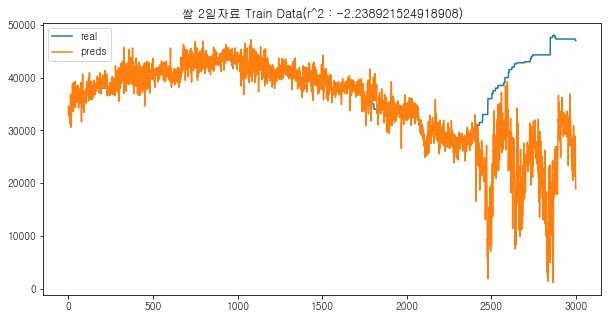

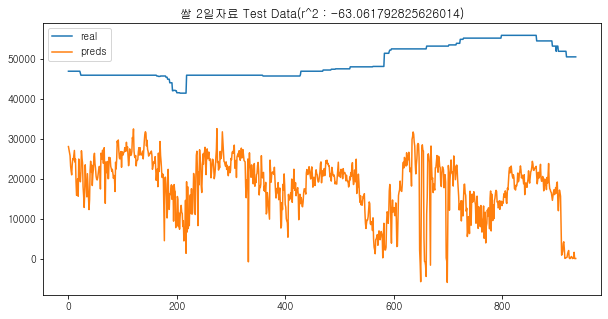

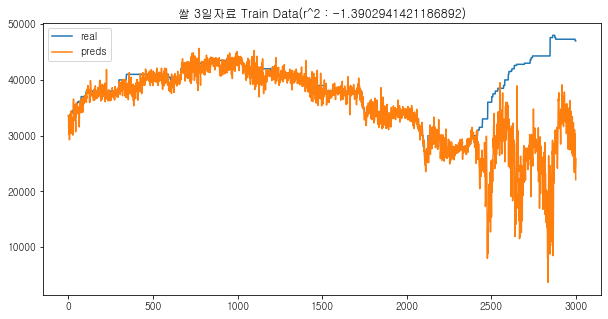

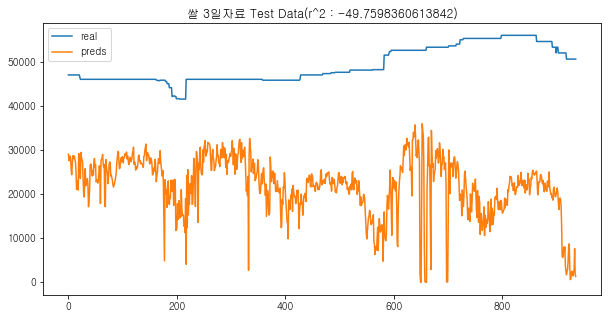

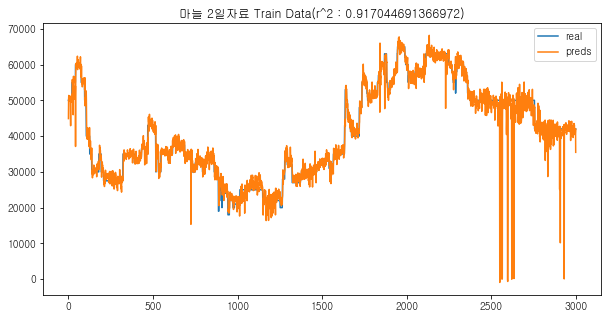

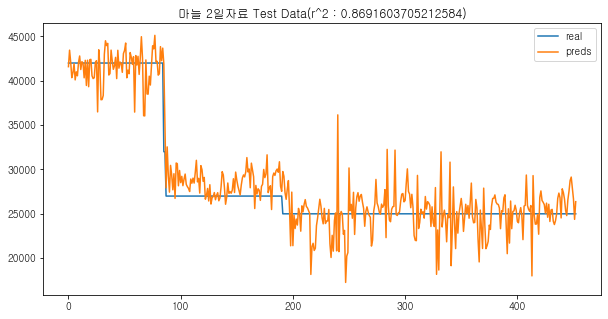

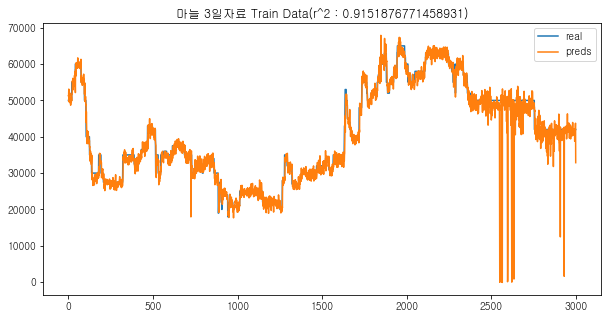

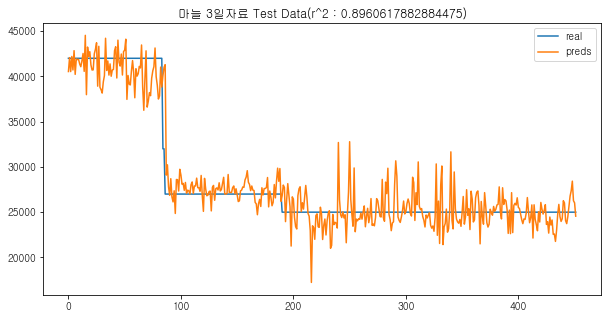

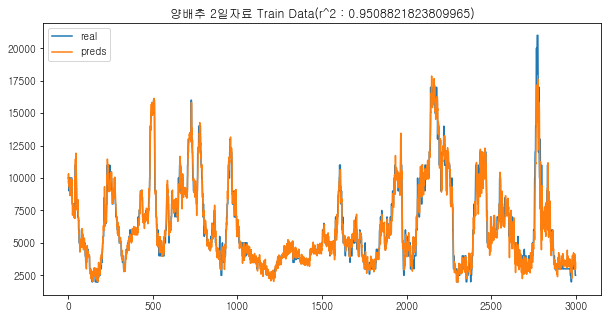

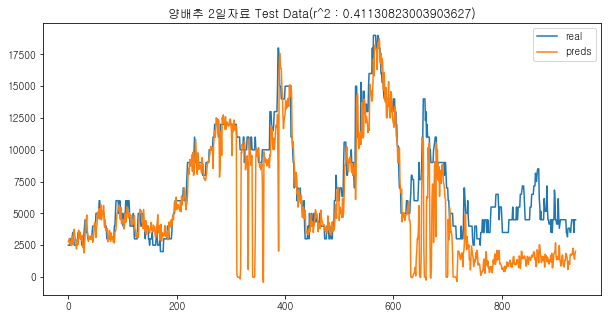

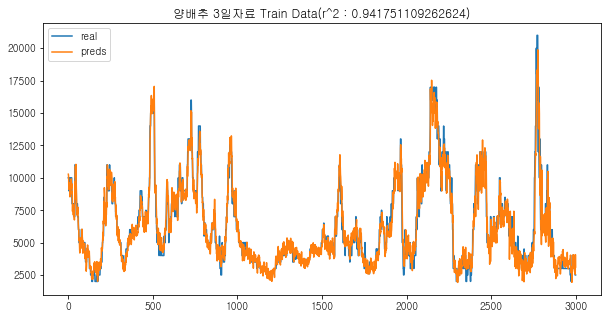

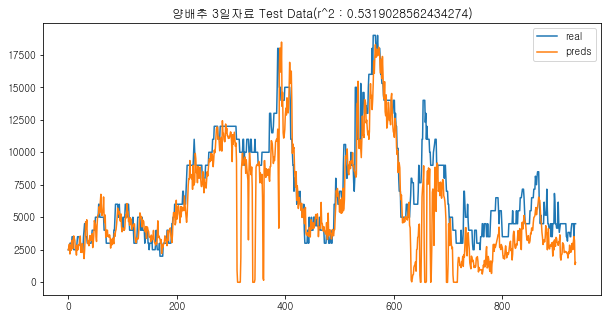

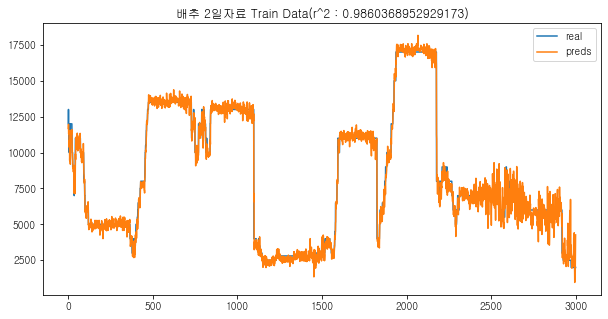

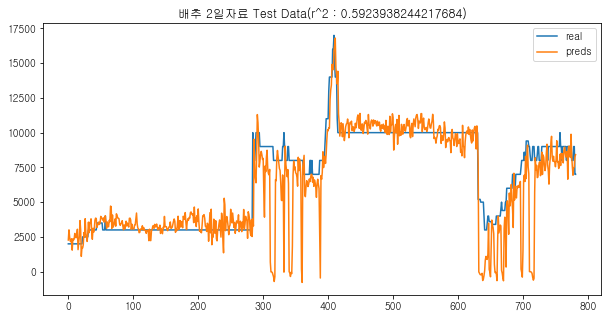

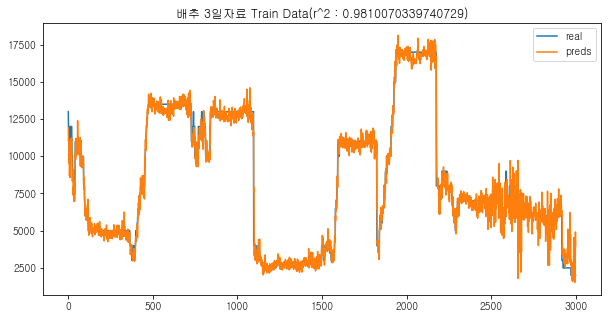

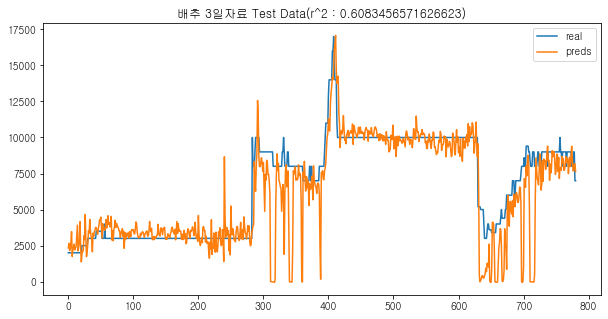

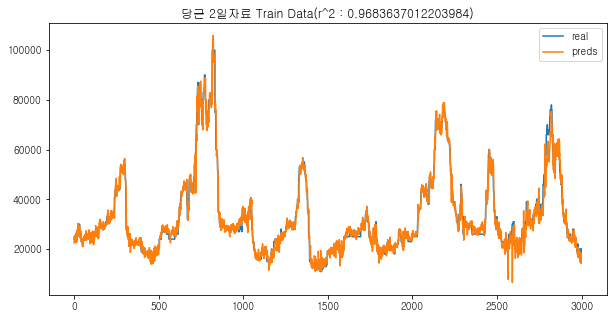

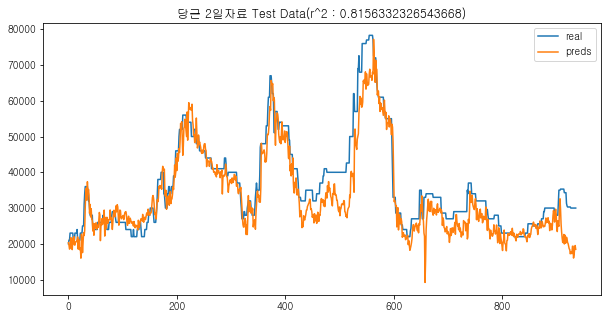

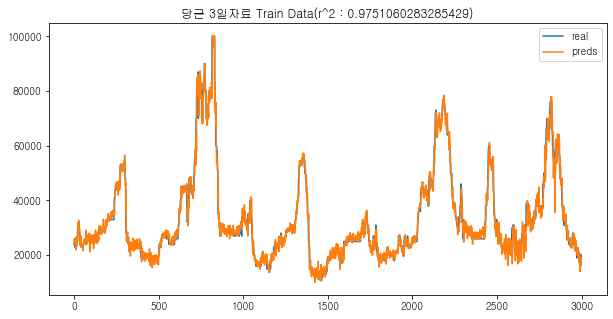

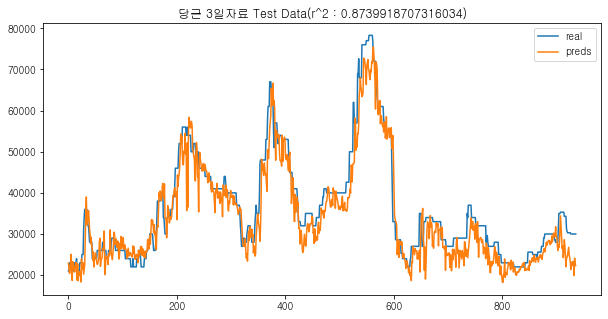

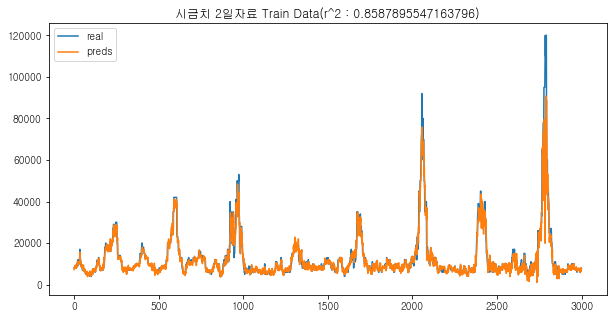

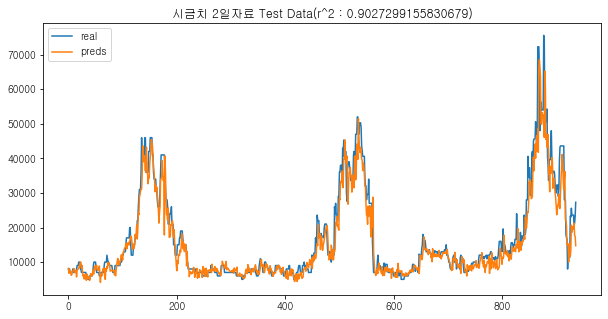

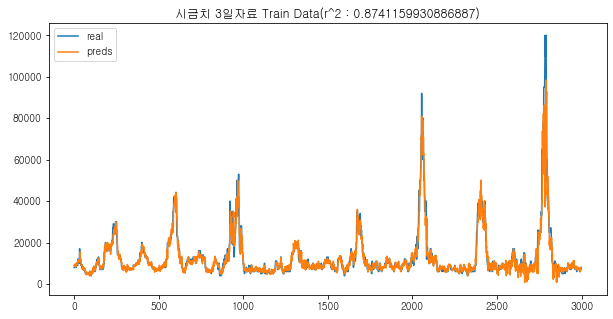

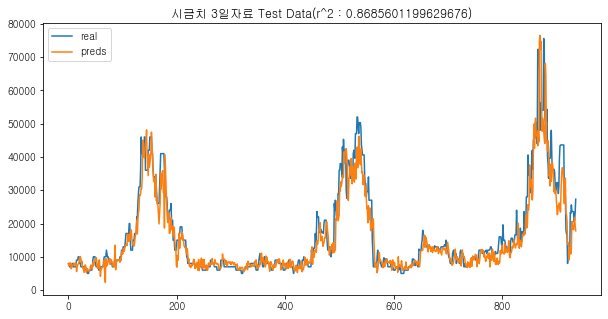

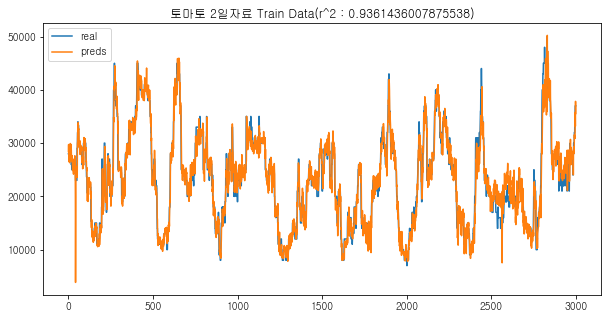

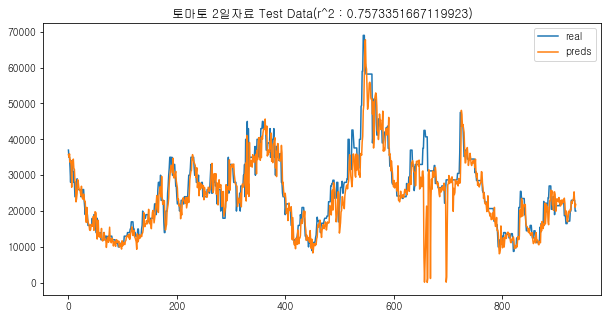

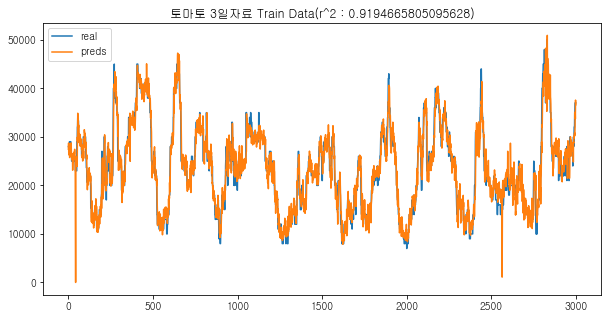

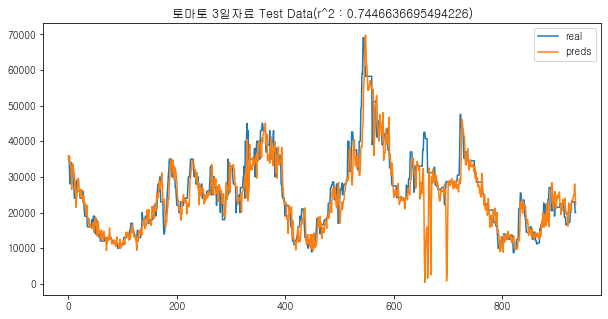

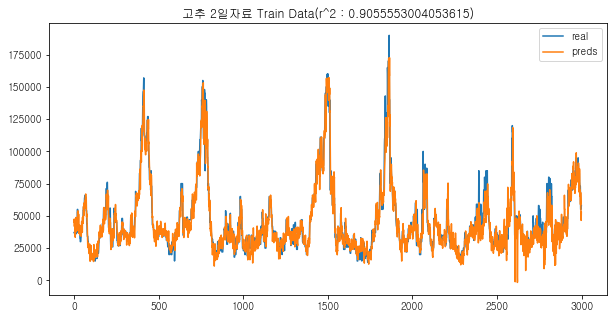

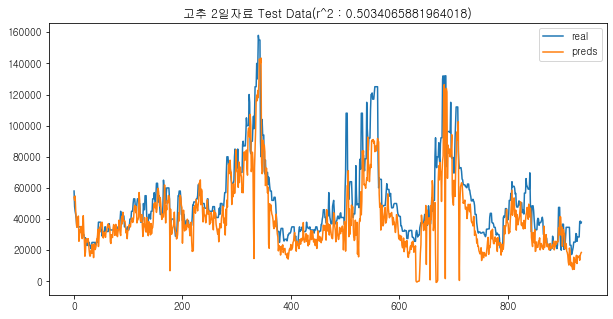

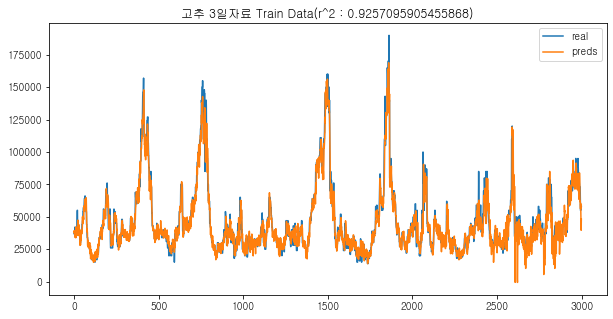

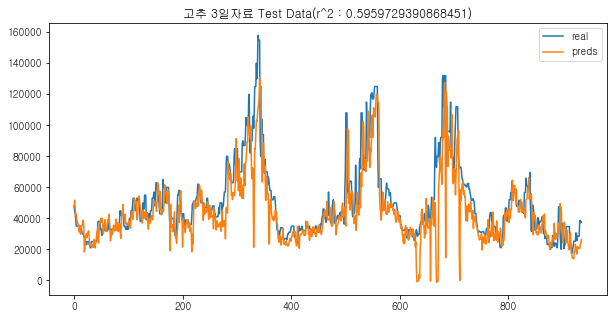

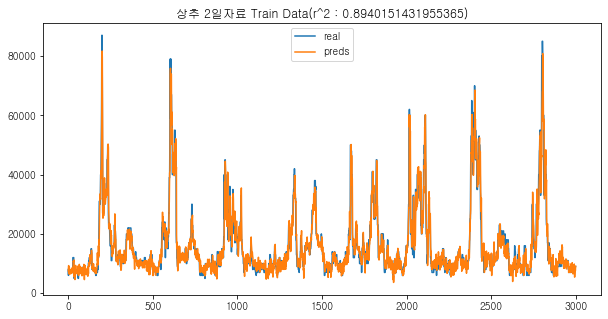

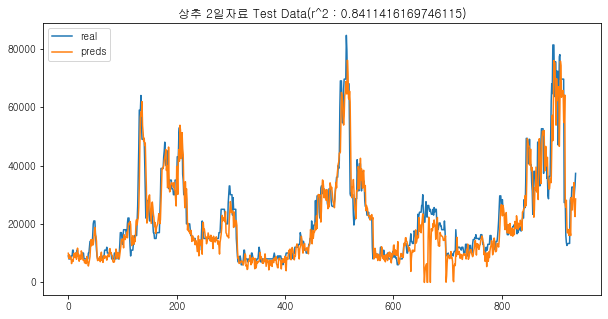

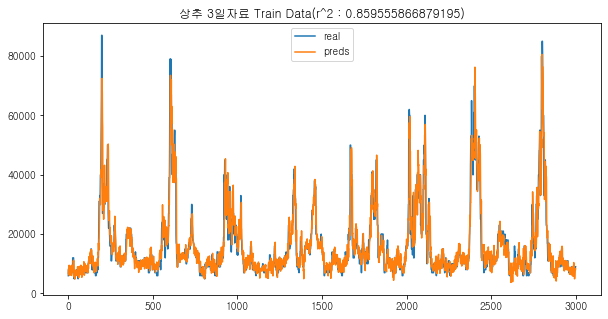

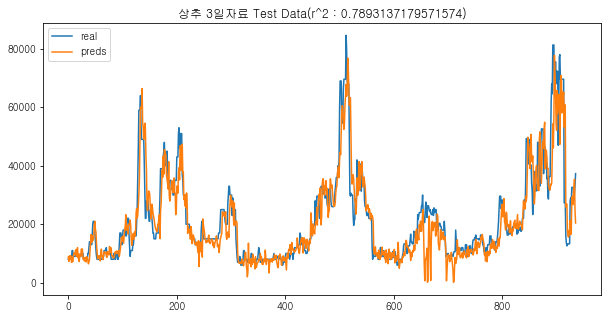

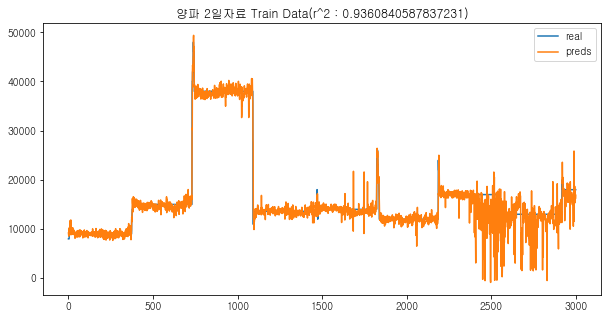

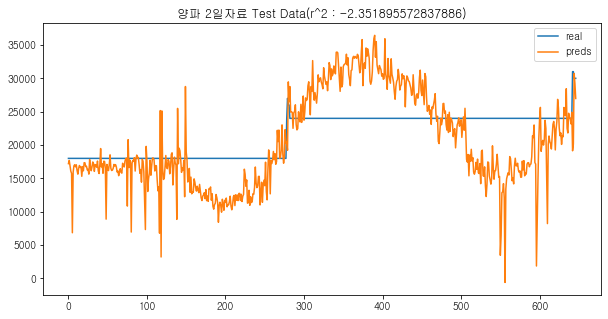

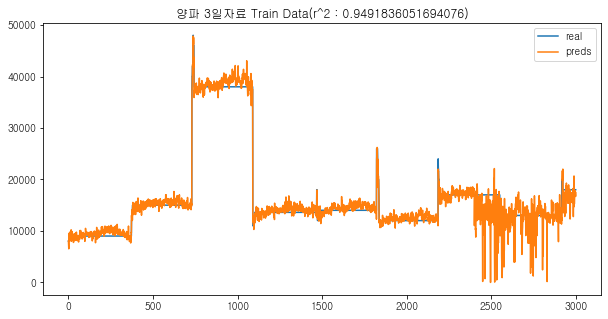

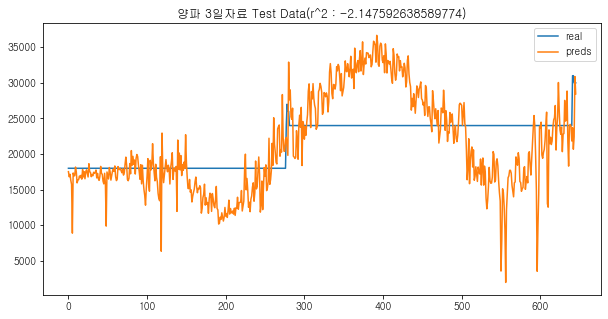

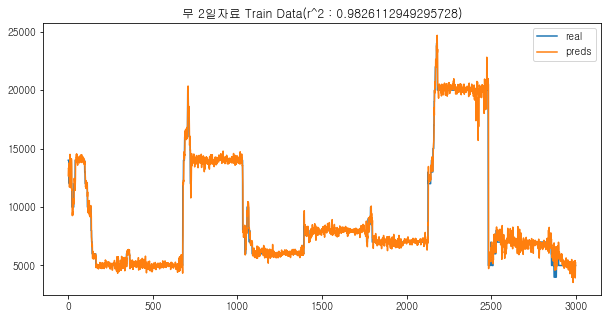

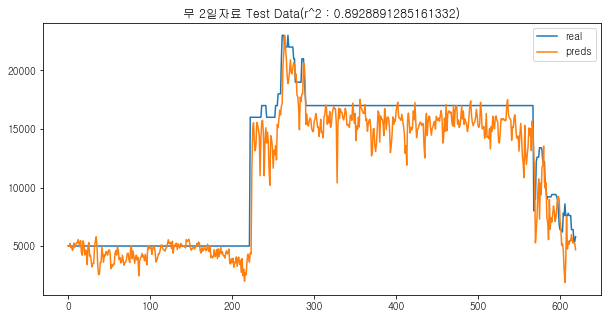

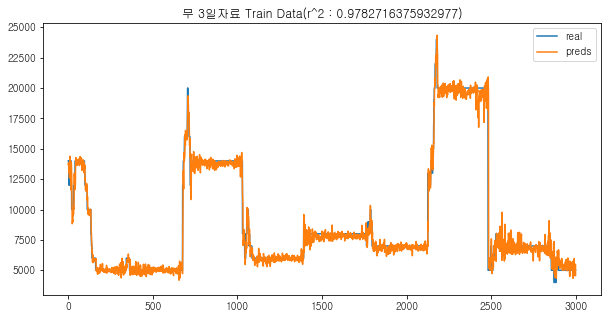

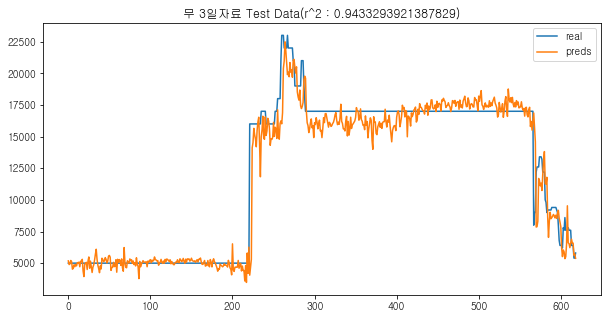

In [41]:
vege_list = ['쌀', '마늘', '양배추', '배추', '당근', '시금치', '토마토', '고추', '상추', '양파', '무']
for vege_name in vege_list :
    climate_df = get_climate_data(vege_name)
    price_df = get_price_data(vege_name)

    if vege_name in null_breaker.keys():
        dead_column = []
        for column in climate_df.columns :

            for eliminate in null_breaker[vege_name] :
                if eliminate in column :
                    dead_column.append(column)

        climate_df.drop(dead_column, axis = 1, inplace = True)
    
    
    climate_df['month'] = climate_df.index.month
    if vege_name == '상추' :
        price_df = price_df[price_df.SubCategory == '적상추']
    merged_df = pd.concat([climate_df.loc[price_df.index[0] : price_df.index[-1]], price_df.Price], axis = 1)
    merged_df.ffill(inplace = True)
    
    scaler = StandardScaler()
    df = scaler.fit_transform(merged_df)
    
    for WINDOWS_NUM in [2, 3] :
        print(vege_name, WINDOWS_NUM)
        X = []
        y = []
        for i in range(len(df) - WINDOWS_NUM):
            X.append([df[i + j] for j in range(WINDOWS_NUM)])
            y.append(merged_df.Price[i +  WINDOWS_NUM])

        X = np.array(X)
        y = np.array(y)
        X_train = X[:3000]
        y_train = y[:3000]
        X_test = X[3000:]
        y_test = y[3000:]

        model = Sequential()
        model.add(LSTM(128, activation = 'LeakyReLU', input_shape = (WINDOWS_NUM, X_train.shape[2])))
        model.add(Dense(1))
        model.summary()

        model.compile(loss='mse', optimizer='adam', metrics = 'mse')
        
        mc = ModelCheckpoint(f'./models/{vege_name}_{WINDOWS_NUM}.h5',
                             monitor='val_loss', mode='min', save_best_only=True)
        
        model.fit(X_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 5, callbacks = [mc])


        model2 = load_model(f'./models/{vege_name}_{WINDOWS_NUM}.h5')
        train_preds = model2.predict(X_train)
        test_preds = model2.predict(X_test)

        plt.figure(figsize = (10, 5))
        plt.plot(y_train, label = 'real')
        plt.plot(train_preds, label = 'preds')
        plt.legend()
        plt.title(f'{vege_name} {WINDOWS_NUM}일자료 Train Data(r^2 : {r2_score(y_train, train_preds)})')
        plt.savefig(f'./models/img/{vege_name}_{WINDOWS_NUM}_train.png')

        plt.figure(figsize = (10, 5))
        plt.plot(y_test, label = 'real')
        plt.plot(test_preds, label = 'preds')
        plt.legend()
        plt.title(f'{vege_name} {WINDOWS_NUM}일자료 Test Data(r^2 : {r2_score(y_test, test_preds)})')
        plt.savefig(f'./models/img/{vege_name}_{WINDOWS_NUM}_test.png')
